<a href="https://colab.research.google.com/github/GabaAraujo/Python_IA/blob/main/Classifica%C3%A7%C3%A3o%20De%20Frutas%20-%20Klusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Questão 5

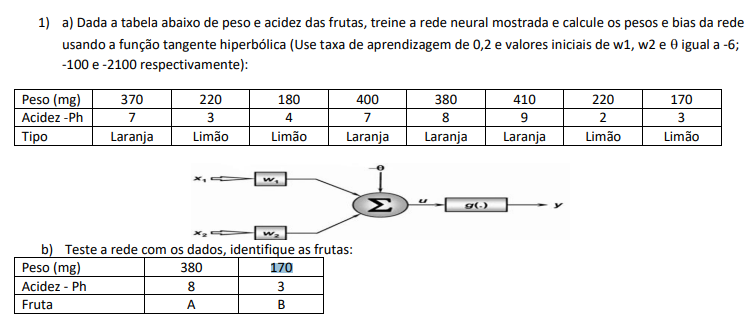

In [ ]:
# colab.research.google.com
!pip install numpy
!pip install matplotlib
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)
import keras
import pandas as pd
import numpy as np

2.13.0


2.13.0
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
1/1 [==============================] - 1s 578ms/step - loss: 390.6777 - mae: 390.6777 - val_loss: 365.4125 - val_mae: 365.4125
Epoch 2/2000
1/1 [==============================] - 0s 41ms/step - loss: 390.3776 - mae: 390.3776 - val_loss: 365.1310 - val_mae: 365.1310
Epoch 3/2000
1/1 [==============================] - 0s 38ms/step - loss: 390.0774 - mae: 390.0774 - val_loss: 364.8495 - val_mae: 364.8495
Epoch 4/2000
1/1 [==============================] - 0s 39ms/step - loss: 389.7773 - mae: 389.7773 - val_loss: 364.5679 - val

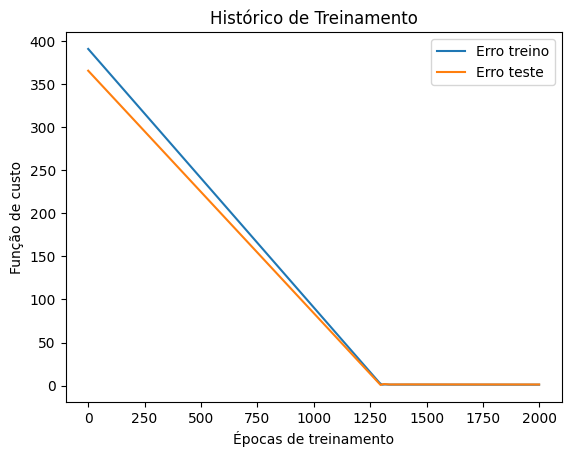

0B -> L1N0: -1.2609341144561768
L0N0                   -> L1N0 = 0.027847614139318466
L0N1                   -> L1N0 = -1.2886998653411865


In [ ]:

import tensorflow as tf
print(tf.__version__)

import keras
import pandas as pd
import numpy as np

# import warnings
# warnings.filterwarnings('ignore')



# Entra com os dados
X_treino = np.array(
    [
        [370,7], [220,3], [180,4], [400,7], [380,8],
        [410,9], [220,2], [170,3]
    ]
)
Y_treino = np.array( [ #-1 laranja / # 1 limao
         [-1],[1],[1],[-1],[-1],
         [-1],[1],[1] ] )
X_teste = np.array(
    [
        [380,8], [170,3]
    ]
)
Y_teste = np.array( [[1],[-1]] )




# Monta a rede
from keras.models import Sequential
from keras.layers import Dense

modelo = Sequential() # Inicializa a Rede Neural Artificial

modelo.add(Dense(units = 1, input_dim = X_treino.shape[1]))



# Mostra a rede
modelo.summary()



# Treina a rede
modelo.compile(loss='mae', optimizer = 'adam', metrics=['mae'])


resultado = modelo.fit(X_treino, Y_treino, batch_size = 13, epochs = 2000, validation_data=(X_teste, Y_teste))



# Mostra o Teste
Y_predito = modelo.predict(X_teste)

Y_predito





# Teste da Rede
Y_predito = modelo.predict(X_teste) # Faz o arrendodamento
Y_predito = [ 1 if y>=0.0 else -1 for y in Y_predito ] #positivo +1 / negativo -1
print("Valores Preditos:",Y_predito)

total = 0
correto = 0
errado = 0
for i in Y_predito:
  total=total+1
  if(Y_teste[i,0] == Y_predito[i]):
    correto=correto+1
  else:
    errado=errado+1

print("Total " + str(total))
print("Correto " + str(correto))
print("Errado " + str(errado))



# Mostra graficos
import matplotlib.pyplot as plt

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()





# Mostra Pesos
for layerNum, layer in enumerate(modelo.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]

    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')

    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')






